<a href="https://colab.research.google.com/github/hugolopg/treinamento_turma3/blob/main/Treinamento_NIAS_IA_Convolucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

# 11.1)

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

Xtrain = np.divide(X_train,255)
Xtest = np.divide(X_test,255)

ytrain = keras.utils.to_categorical(y_train, num_classes=10)
ytest = keras.utils.to_categorical(y_test, num_classes=10)

170508288/170498071 [==============================] - 2s 0us/step


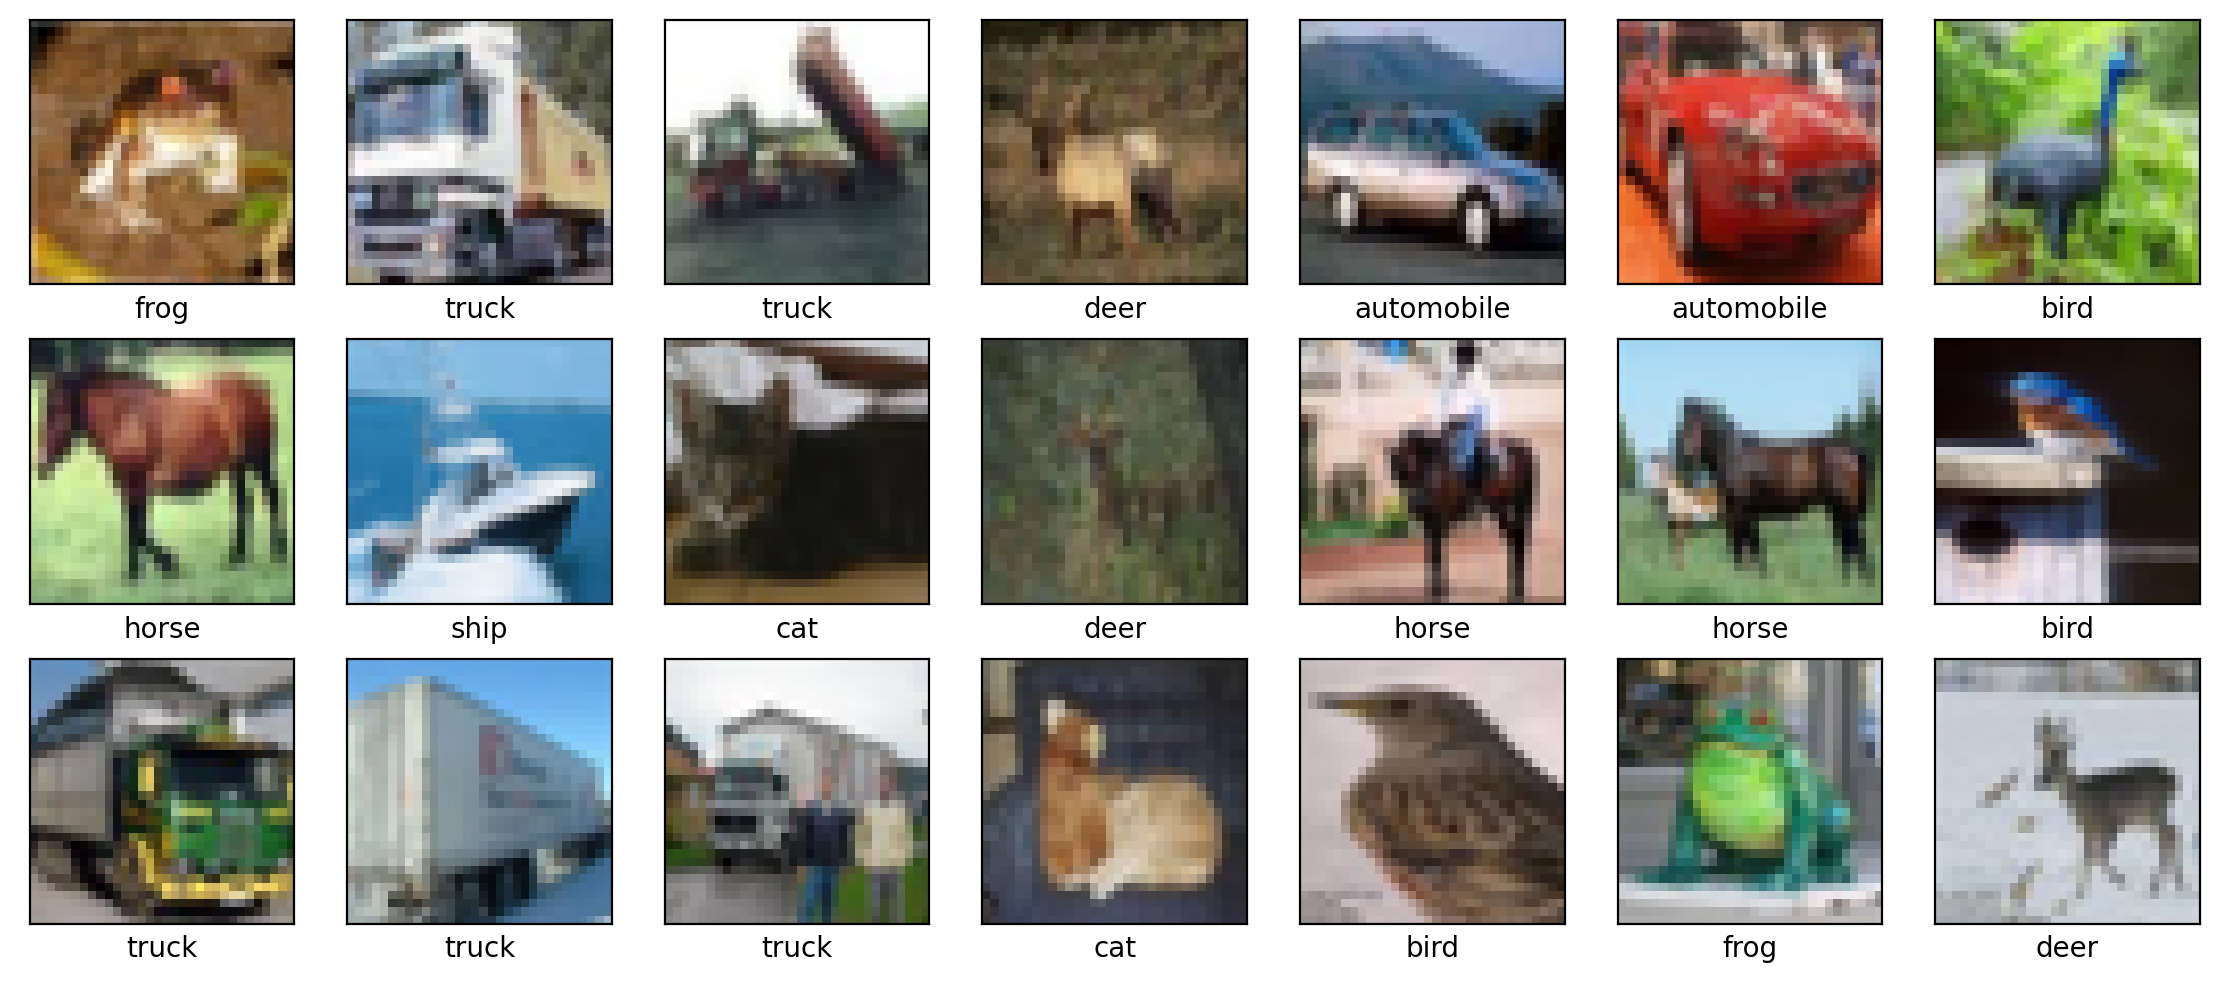

In [2]:
def imgEx(X,y):
  description = ['airplane','automobile','bird','cat','deer',
                 'dog','frog','horse','ship','truck']
  plt.figure(figsize=(14,6),dpi=200)
  for img in range(21):
      plt.subplot(3,7,img+1)
      plt.xticks([])
      plt.yticks([])
      plt.imshow(X[img,:,:,:])
      plt.xlabel(description[int(y[img])])
  plt.show()
imgEx(X_train,y_train)

In [3]:
formaI = Xtrain.shape[1:]
formaO = ytrain.shape[1]

def baseBlock(input,nFilt,kernelSize,activation='ReLU',padding='same',
              dropout=True,normalization=True,dropoutRatio=0.3):
  formaI = input.shape[1:]
  inputLayer = keras.layers.Conv2D(nFilt,kernelSize,
                                   padding=padding,
                                   activation=activation,
                                   input_shape=formaI)(input)
  maxPooling = keras.layers.MaxPooling2D(padding=padding)(inputLayer)
  if dropout:
    dropoutLayer = keras.layers.Dropout(rate=dropoutRatio)(maxPooling)
  else:
    dropoutLayer = maxPooling
  if normalization:
    normalizationLayer = keras.layers.BatchNormalization()(dropoutLayer)
  else:
    normalizationLayer = dropoutLayer
    
  return normalizationLayer

def claImg(input,neurons,activation='ReLU',
           out_activation='softmax',num_classes=10):
  flat = keras.layers.Flatten()(input)
  dense = keras.layers.Dense(neurons,activation=activation,
                             input_shape=flat.shape)(flat)
  output = keras.layers.Dense(num_classes,activation=out_activation,
                              input_shape=flat.shape)(dense)
  return output

input = keras.Input(shape=formaI)

base1 = baseBlock(input,32,3)
base2 = baseBlock(base1,64,3)
base3 = baseBlock(base2,128,3)

output = claImg(base3,128)

modelo = keras.models.Model(inputs=input,outputs=output)
ES = keras.callbacks.EarlyStopping(patience=10,min_delta=0,
                                   restore_best_weights=True)
modelo.compile(optimizer="adam",loss="binary_crossentropy",
               metrics="accuracy")

modelo.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496 

In [4]:
auginput = keras.Input(shape=formaI)

augbase1 = baseBlock(input,32,3)
augbase2 = baseBlock(base1,64,3)
augbase3 = baseBlock(base2,128,3)

augoutput = claImg(base3,128)

augmodelo = keras.models.Model(inputs=input,outputs=output)
augES = keras.callbacks.EarlyStopping(patience=10,min_delta=0,
                                      restore_best_weights=True)
augmodelo.compile(optimizer="adam",loss="binary_crossentropy",
                  metrics="accuracy")

augmodelo.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        1849

In [5]:
hPuro = modelo.fit(Xtrain, ytrain, batch_size=128,
                   epochs=50, callbacks=ES, 
                   validation_data=(Xtest, ytest))

Epoch 1/50
391/391 [==============================] - 133s 334ms/step - loss: 0.2463 - accuracy: 0.4457 - val_loss: 0.7649 - val_accuracy: 0.1003
Epoch 2/50
391/391 [==============================] - 135s 344ms/step - loss: 0.1885 - accuracy: 0.5874 - val_loss: 0.2611 - val_accuracy: 0.4458
Epoch 3/50
391/391 [==============================] - 127s 326ms/step - loss: 0.1641 - accuracy: 0.6474 - val_loss: 0.1572 - val_accuracy: 0.6661
Epoch 4/50
391/391 [==============================] - 125s 320ms/step - loss: 0.1485 - accuracy: 0.6871 - val_loss: 0.1356 - val_accuracy: 0.7215
Epoch 5/50
391/391 [==============================] - 124s 316ms/step - loss: 0.1376 - accuracy: 0.7145 - val_loss: 0.1380 - val_accuracy: 0.7122
Epoch 6/50
391/391 [==============================] - 125s 321ms/step - loss: 0.1292 - accuracy: 0.7348 - val_loss: 0.1865 - val_accuracy: 0.6194
Epoch 7/50
391/391 [==============================] - 125s 319ms/step - loss: 0.1230 - accuracy: 0.7490 - val_loss: 0.1215 -

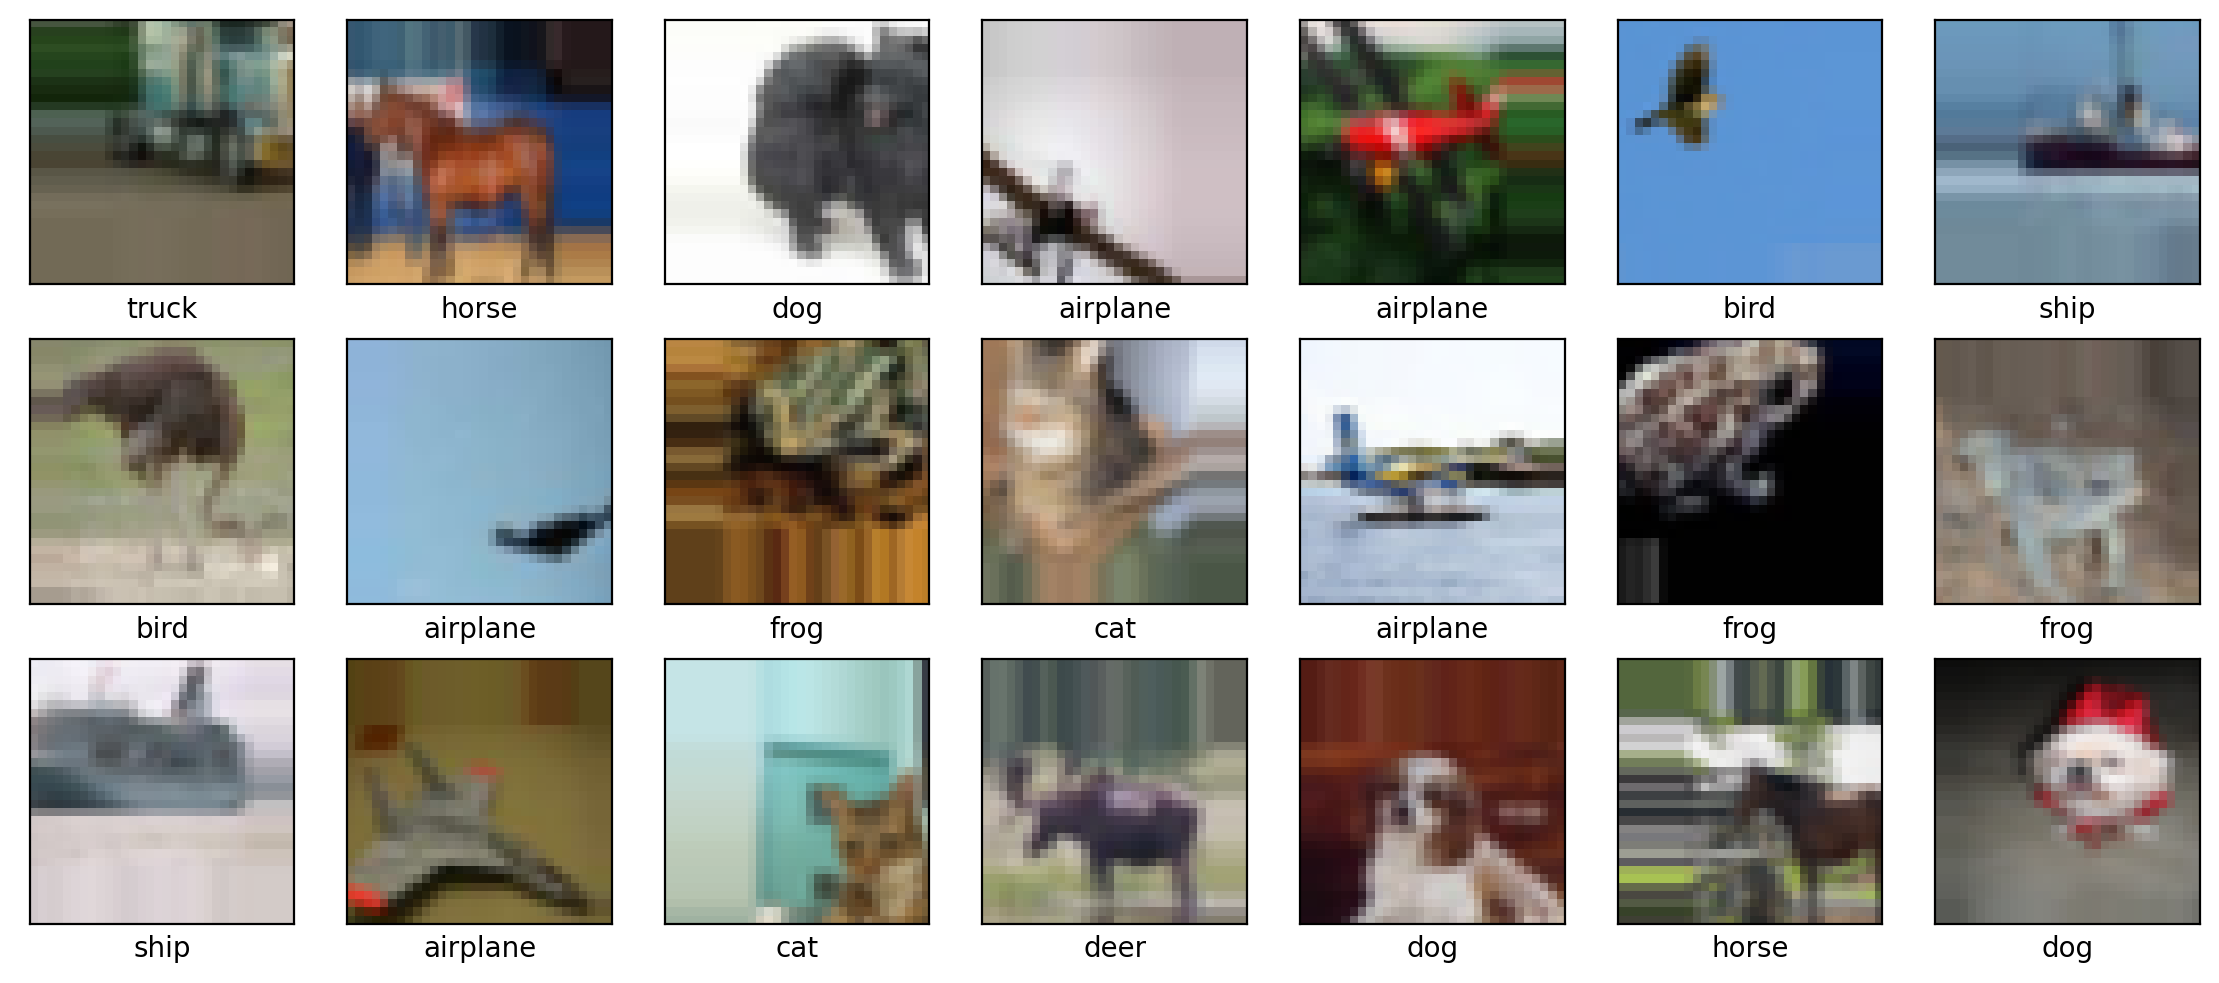

In [6]:
def imgEx2(X,y):
  description = ['airplane','automobile','bird','cat','deer',
                 'dog','frog','horse','ship','truck']
  plt.figure(figsize=(14,6),dpi=200)
  for img in range(21):
      plt.subplot(3,7,img+1)
      plt.xticks([])
      plt.yticks([])
      plt.imshow(X[img,:,:,:])
      plt.xlabel(description[np.unravel_index(y[img].argmax(),shape=len(y[img]))[0]])
  plt.show()

imgen = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                     width_shift_range=0.3,
                                                     height_shift_range=0.3)
imgen.fit(Xtrain)

augimg = imgen.flow(Xtrain,ytrain,batch_size=128)

augX, augy = next(augimg)

imgEx2(augX,augy)

In [7]:
hAug = augmodelo.fit(augimg, steps_per_epoch=Xtrain.shape[0]//128,
                  epochs=50, callbacks=ES,
                  validation_data=(Xtest, ytest))

Epoch 1/50
390/390 [==============================] - 144s 366ms/step - loss: 0.1971 - accuracy: 0.5766 - val_loss: 0.1386 - val_accuracy: 0.7131
Epoch 2/50
390/390 [==============================] - 143s 368ms/step - loss: 0.1756 - accuracy: 0.6160 - val_loss: 0.1974 - val_accuracy: 0.6469
Epoch 3/50
390/390 [==============================] - 143s 367ms/step - loss: 0.1682 - accuracy: 0.6370 - val_loss: 0.1242 - val_accuracy: 0.7475
Epoch 4/50
390/390 [==============================] - 142s 365ms/step - loss: 0.1633 - accuracy: 0.6495 - val_loss: 0.1525 - val_accuracy: 0.7105
Epoch 5/50
390/390 [==============================] - 142s 364ms/step - loss: 0.1592 - accuracy: 0.6608 - val_loss: 0.1293 - val_accuracy: 0.7305
Epoch 6/50
390/390 [==============================] - 143s 368ms/step - loss: 0.1559 - accuracy: 0.6692 - val_loss: 0.1556 - val_accuracy: 0.6824
Epoch 7/50
390/390 [==============================] - 142s 365ms/step - loss: 0.1539 - accuracy: 0.6727 - val_loss: 0.2030 -

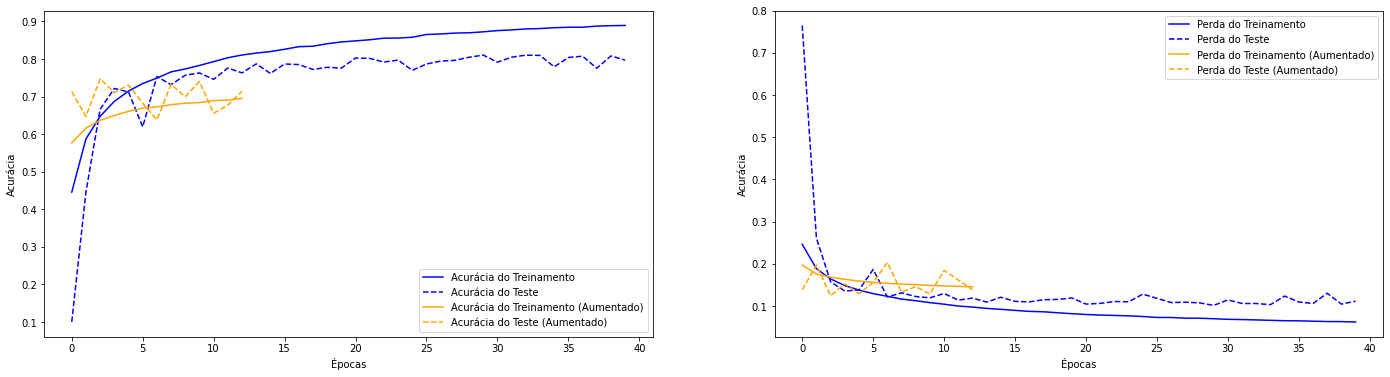

In [8]:
fig, (acc,los) = plt.subplots(1,2,figsize=(24,6));

acc.plot(hPuro.history['accuracy'],
         label='Acurácia do Treinamento',
         c='blue', ls='-')
acc.plot(hPuro.history['val_accuracy'],
         label='Acurácia do Teste',
         c='blue', ls='--')
acc.plot(hAug.history['accuracy'],
         label='Acurácia do Treinamento (Aumentado)',
         c='orange', ls='-')
acc.plot(hAug.history['val_accuracy'],
         label='Acurácia do Teste (Aumentado)',
         c='orange',ls='--')

acc.set_xlabel('Épocas')
acc.set_ylabel('Acurácia')
acc.legend(loc='lower right')

los.plot(hPuro.history['loss'],
         label='Perda do Treinamento',
         c='blue', ls='-')
los.plot(hPuro.history['val_loss'],
         label='Perda do Teste',
         c='blue',ls='--')
los.plot(hAug.history['loss'],
         label='Perda do Treinamento (Aumentado)',
         c='orange', ls='-')
los.plot(hAug.history['val_loss'],
         label='Perda do Teste (Aumentado)',
         c='orange',ls='--')

los.set_xlabel('Épocas')
los.set_ylabel('Acurácia')
los.legend(loc='upper right')

In [11]:
ACpuro = modelo.evaluate(Xtest, ytest)
print('Acurácia do BD sem aumento:',ACpuro)

ACaug = augmodelo.evaluate(Xtest, ytest)
print('Acurácia do BD com aumento:',ACaug)

313/313 [==============================] - 8s 24ms/step - loss: 0.1242 - accuracy: 0.7475
Acurácia do BD sem aumento: [0.12419319152832031, 0.7475000023841858]
313/313 [==============================] - 8s 24ms/step - loss: 0.1242 - accuracy: 0.7475
Acurácia do BD com aumento: [0.12419319152832031, 0.7475000023841858]
